In [2]:
# # Download Dataset
# from sklearn.datasets import fetch_openml 
# import numpy as np

# mnist = fetch_openml("mnist_784",version=1,as_frame=False)
# mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
# mnist.keys()

In [3]:
%matplotlib inline
from joblib import dump,load

# dump((mnist),"dataset.joblib")
mnist = load("dataset.joblib")

#### 'data' includes array of one instance per row and one Column per feature
#### 'target' includes all digits label
#### 'DESCR' describes data set

In [4]:
X, y = mnist.data, mnist.target 
print("Train set:", X.shape)
print("Test set:", y.shape)

Train set: (70000, 784)
Test set: (70000,)


In [5]:
# Converting Data Frame into Numpy Array
# import pandas as pd

# X = X.to_numpy()

In [6]:
type(mnist.target )

numpy.ndarray

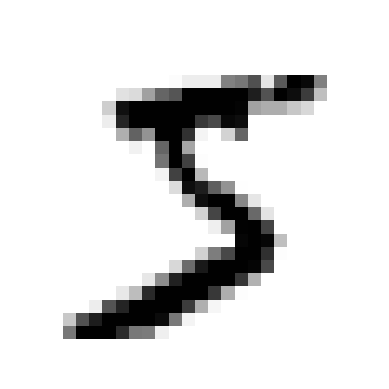

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis('off')
plt.show()

In [8]:
y[0] # Label is also 5

5

In [9]:
# Convert String label into (int label)
import numpy as np
y = y.astype(np.uint8)

In [10]:
# Split test and train data
X_train, X_test, y_train, y_test = X[:60000], X[60000:] , y[:60000], y[60000:]

In [11]:
type(X_train)

numpy.ndarray

In [12]:
# Create Binary Classifier for Single Digit (5)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
# Train Binary Classifier using Stochastic Gradient Descent (SGD)

from sklearn.linear_model import SGDClassifier

# sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_train,y_train_5)



In [14]:
# dump((sgd_clf),"sgd_clf.joblib")
sgd_clf = load("sgd_clf.joblib")

In [15]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [16]:
# Evaluate using Cross Validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

### Observation: 
1. In sdg_clf accuracy is 95% of containing 5 Digit in dataset
2. But in Never5Classifier accuracy is 90% is not 5 Digit in Dataset
3. Concludes Accuracy is not ideal to performance measure for Classifier Model

In [18]:
# Confusion Matrix is used for Performance measure in Classifier
# First we predict the values then compare with actual values to check 
# how many times classifier confused with different Digit

from sklearn.model_selection import cross_val_predict

# y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [19]:

# dump((y_train_pred),'sgd_clf_predict_score.joblib')
y_train_pred = load('sgd_clf_predict_score.joblib')
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [20]:
from sklearn.metrics import confusion_matrix
 
confusion_matrix(y_train_5,y_train_pred) 

array([[53892,   687],
       [ 1891,  3530]])

In [21]:
y_train_prefect_predictions = y_train_5 # pretend we reach perfection

confusion_matrix(y_train_5,y_train_prefect_predictions)

array([[54579,     0],
       [    0,  5421]])

The prefect Classifier will only have non zero value only on main diagonal example


In [22]:
# Precision is the accuracy of positive instance
# Recall is ratio of positive instance
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5,y_train_pred)) # => 3530 / (3530+687)
print(recall_score(y_train_5,y_train_pred))    # => 3530 / (3530+1891)

0.8370879772350012
0.6511713705958311


In [23]:
# To compare two classifier we use F1 score
# which use harmonic mean which give weight to low values
# means if both recall and precision are high F1 score will be high
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [24]:
sgd_clf = load("sgd_clf.joblib")

In [25]:
# Decision function assign instance to positive class if score is greater than threshold
# else to negative class
sgd_clf
y_score = sgd_clf.decision_function([some_digit]) # Decision function not allows to set it's score
y_score

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [26]:
threshold = 0      # but we can get access of decision function score and use threshold                  
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([[False, False, False,  True, False, False, False, False, False,
        False]])

In [27]:
threshold = 8000 
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [28]:
# Increased threshold decreases recall because the some_digit image represent digit 5
# How can we know which threshold to use 
# For that we use cross_val_predict with method "decision function"
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [29]:
# We can compute precision,recall and all possible threshold
# using precision_recall_curve() function

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

Recall for 90% Precision:  0.4799852425751706
Threshold for 90% Precision:  3370.0194991439557


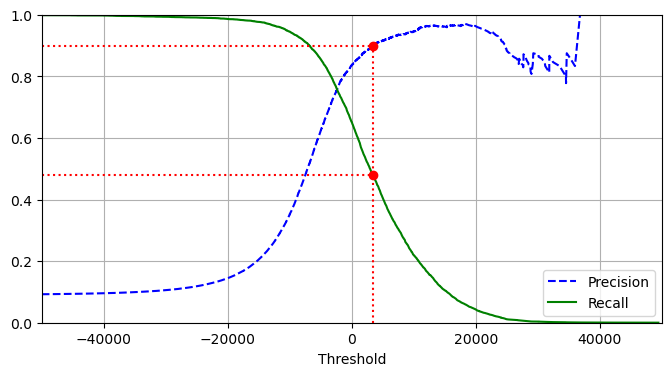

In [30]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label="Precision")
    plt.plot(thresholds,recalls[:-1],'g-',label="Recall")
    plt.grid(True)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel('Threshold')
    plt.legend()
    plt.axis([-50000, 50000, 0, 1]) 
    
     
recall_90_precision = recalls[np.argmax(precisions >= 0.90)] # What will be ratio(recall) for 90% accuracy(precision)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # What will be threshold for 90% accuracy(precision)
print("Recall for 90% Precision: ",recall_90_precision)
print("Threshold for 90% Precision: ", threshold_90_precision)
plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")    # Straight line from x axis= 0         
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")  # Horizontal straight line from y axis = 0.9  
                                                              # to x axis = -5000
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")  
                                                              # Horizontal straight line from y axis = 0.47  
                                                              # to x axis = -5000
plt.plot([threshold_90_precision], [0.9], "ro")               # Circle dot from precision 90%                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro") # Circle dot from recall 47%                            
                                          
plt.show()


In [31]:
precisions[57075:57080]
# recalls[57075:57]

array([0.90003459, 0.9       , 0.89996539, 0.89993075, 0.90024247])

Recall at 90% Precision:  0.4799852425751706


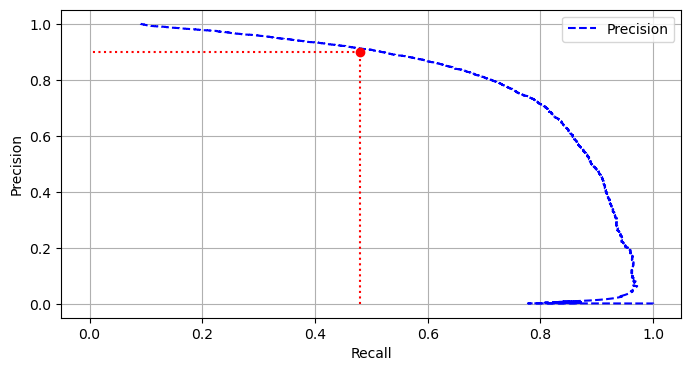

In [32]:
# Precision vs Recall

def precision_vs_recall(precisions,recalls):
    plt.plot(precisions[:-1],recalls[:-1],'b--',label="Precision")
    plt.grid(True)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
print("Recall at 90% Precision: ", recall_90_precision)
plt.figure(figsize=(8, 4))                                                                  
precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:") 
plt.plot([recall_90_precision], [0.9], "ro")   
plt.plot([recall_90_precision,0],[0.9,0.9], "r:")

In [33]:
# Find the first index of maximum threshold 

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [34]:
# Make prediction on training set

y_train_pred_90 = (y_scores >= threshold_90_precision)
print("Precision: ", precision_score(y_train_5,y_train_pred_90))
print("Recall: ", recall_score(y_train_5,y_train_pred_90))

Precision:  0.9000345901072293
Recall:  0.4799852425751706


 ### Obervation:

1. For 90% Precision, threshold will be 3370.0194991439557
2. Recall at 90% Precision is 0.4799852425751706

## ROC curve
1. FPR (false positive rate) ratio of negative instance wrongly classified as positive 
2. TPR (true positive rate) ratio of positive instance correctly classified as positive 
3. TNR/Specifity (true negative rate) ratio of negative instance correctly classified as negative 
4. FPR = 1 - (Specifity)

In [35]:
# It is very similar to the precision/recall curve
# Tool used for binary classifier
# Compute FPR and TPR for various threshold using ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

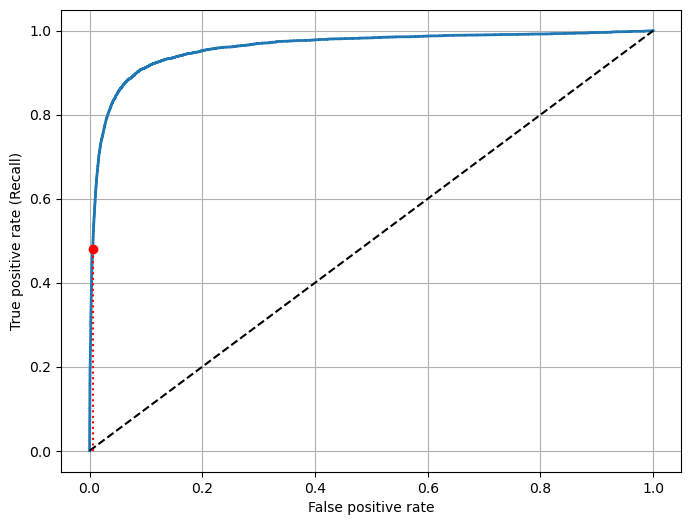

In [36]:
# Plot roc Curve

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid(True)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate (Recall)")
    
plt.figure(figsize=(8, 6))   
plot_roc_curve(fpr,tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],'r:')
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],'r:')
plt.plot([fpr_90], [recall_90_precision], "ro")    
plt.show()

In [37]:
# One way to compare classifiers is to measure the area under the curve (AUC)

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616

### Note: 

1. Always use Precision/Recall curve when positive rate is rare
2. ROC curve otherwise

In [38]:
# RandomForestClassifier does not have decision function but predict_proba function

from sklearn.ensemble import RandomForestClassifier

# forest_clf = RandomForestClassifier(random_state=42)
# y_proba_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3, method='predict_proba')


In [39]:
# dump((y_proba_forest), "forest_clf_predict.joblib")
y_proba_forest = load("forest_clf_predict.joblib")

In [40]:
y_proba_forest # probability of instance per row, column per class

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [41]:
y_score_forest = y_proba_forest[:, 1] # score = proba of positive class

fpr_forest, tpr_forest, threshold = roc_curve(y_train_5,y_score_forest)


In [42]:
y_score_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

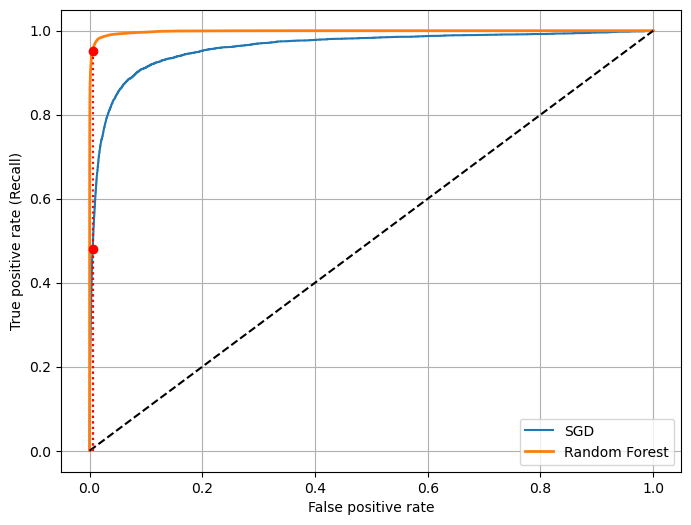

In [43]:
# Compare SGD and RandomForestClassifier

plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.grid(True)

# For SGD
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],'r:')
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],'r:')
plt.plot([fpr_90], [recall_90_precision], "ro")    

#For Random Forest
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]
plt.plot([fpr_90,fpr_90],[0.,recall_for_forest],'r:')
plt.plot([fpr_90], [recall_for_forest], "ro")    

plt.legend(loc="lower right")
plt.show()

In [44]:
roc_auc_score(y_train_5,y_score_forest)

0.9983436731328145

### Observation:
1. RandomForestClassification Curve is more towards left top corner as compare to SDG 
2. roc_auc_score of RFC is much better to SDG

## Checking 99% Precision for RandomForestClassification

In [45]:
# Now computing Recall and precision of Random Forest Classification

from sklearn.metrics import precision_recall_curve

forest_precisions, forest_recalls, forest_thresholds = precision_recall_curve(y_train_5,y_score_forest)

Forest Recall for 99% Precision:  0.8662608374838591
Forest Threshold for 99% Precision:  0.51


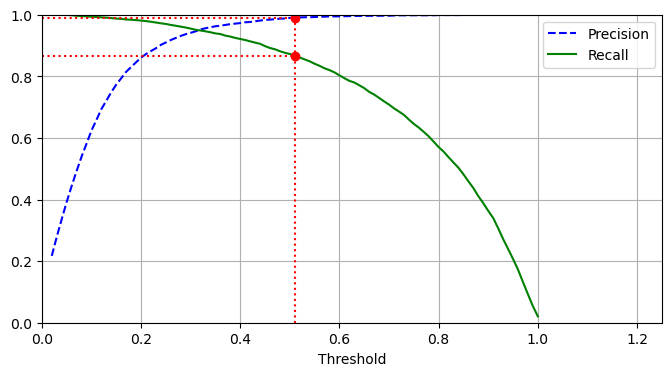

In [46]:
def plot_forest_precision_recall_vs_thresholds(forest_precisions,forest_recalls,forest_thresholds):
    plt.plot(forest_thresholds,forest_precisions[:-1],'b--',label="Precision")
    plt.plot(forest_thresholds,forest_recalls[:-1],'g-',label="Recall")
    plt.grid(True)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel('Threshold')
    plt.legend()
    plt.axis([0, 1.25, 0, 1]) 

    
#---------------#
forest_recall_99_precision = forest_recalls[np.argmax(forest_precisions >= 0.99)] 
forest_threshold_99_precision = forest_thresholds[np.argmax(forest_precisions >= 0.99)]

print("Forest Recall for 99% Precision: ",forest_recall_99_precision)
print("Forest Threshold for 99% Precision: ", forest_threshold_99_precision)
plt.figure(figsize=(8, 4))                                                                  
plot_forest_precision_recall_vs_thresholds(forest_precisions, forest_recalls, forest_thresholds)
plt.plot([forest_threshold_99_precision, forest_threshold_99_precision], [0., 0.99], "r:")    # Straight line from x axis= 0         
plt.plot([0, forest_threshold_99_precision], [0.99, 0.99], "r:")  # Horizontal straight line from y axis = 0.99  
#                                                               # to x axis = 0
plt.plot([0, forest_threshold_99_precision], [forest_recall_99_precision, forest_recall_99_precision], "r:")  
#                                                               # Horizontal straight line from y axis = 0.97  
#                                                               # to x axis = -5000
plt.plot([forest_threshold_99_precision], [0.99], "ro")               # Circle dot from precision 99%                            
plt.plot([forest_threshold_99_precision], [forest_recall_99_precision], "ro")


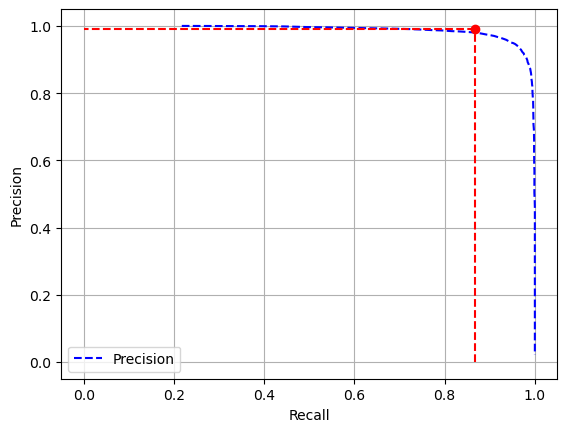

<Figure size 800x400 with 0 Axes>

In [47]:
# Precision vs Recall for Random Forest Classification

precision_vs_recall(forest_precisions,forest_recalls)
plt.plot([forest_recall_99_precision,forest_recall_99_precision],[0,0.99],'r--')
plt.plot([forest_recall_99_precision],[0.99],'ro')
plt.plot([forest_recall_99_precision,0],[0.99,0.99],'r--')
plt.figure(figsize=(8, 4))       
plt.show()

In [48]:
# Find the first index of maximum threshold 

forest_threshold_99_precision = forest_thresholds[np.argmax(forest_precisions >= 0.99)]
forest_threshold_99_precision

0.51

In [49]:
# Make prediction on training set

forest_y_train_pred_99 = (y_score_forest >= forest_threshold_99_precision)
print("Precision: ", precision_score(y_train_5,forest_y_train_pred_99))
print("Recall: ", recall_score(y_train_5,forest_y_train_pred_99))

Precision:  0.9905083315756169
Recall:  0.8662608374838591


### Observation: Predicted Precision and Recall by Threshold using Randorm Forest Classification
At Threshold 0.51
1. Recall is 0.86 
2. Precision is 0.99 

# MutliClass Classification 

In [50]:
# Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐class
# classification task

from sklearn.svm import SVC

# svm_clf = SVC()
# svm_clf.fit(X_train,y_train) # In this case we provided y_train not y_train_5, it automatically detected 0v0 strategy
# svm_clf.predict([some_digit])

In [51]:
# dump((svm_clf),"svm_clf.joblib")
svm_clf = load("svm_clf.joblib")

In [52]:
# 0v0 compute decision function score based on class won the most dual

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [53]:
np.argmax(some_digit_scores)

5

The highest score 9.3 is indeed the class 5

In [54]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
# To force sklearn to use specific strategy e.g OvO or OvR (even we can pass binary classifier)

from sklearn.multiclass import OneVsRestClassifier

# ovr_clf = OneVsRestClassifier(SVC())
# ovr_clf.fit(X_train,y_train)

In [56]:
# dump((ovr_clf),"oneVsrest_clf.joblib")
ovr_clf = load("oneVsrest_clf.joblib")

In [57]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [58]:
len(ovr_clf.estimators_)

10

In [59]:
# sgd_clf.fit(X_train,y_train)
# sgd_clf.predict([some_digit])

In [60]:
# dump((sgd_clf), "sgd_clf_full_dataset.joblib")
sgd_clf = load("sgd_clf_full_dataset.joblib")

In [61]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

### Observation:
1. SGDClassifier predict '5' as '3'
2. Also decision function score more about '3' => '1823.7', then '5' => '-1385.8'

In [62]:
# Evaluation on SDGClassifier 

cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [63]:
# Scaling inputs increases accuracy
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

In [ ]:
# dump(y_train_pred,"X_train_scaled.joblib")
# y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
y_train_pred = load("X_train_scaled.joblib")

# Error Analysis
1. Follow Data Preperation Pipeline

In [80]:
# conf_mx = confusion_matrix(y_train,y_train_pred)
# dump((conf_mx),"conf_mx.joblib")
from joblib import dump,load

conf_mx  = load("conf_mx.joblib")
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

['X_train_scaled.joblib']

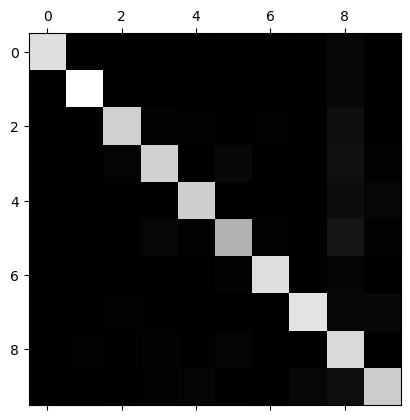

In [65]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [66]:
# To compute error_rate divide each value of conf_mx with corresponding class

row_sums = conf_mx.sum(axis=1,keepdims=True)
norms_conf_mx = conf_mx / row_sums
norms_conf_mx.shape

(10, 10)

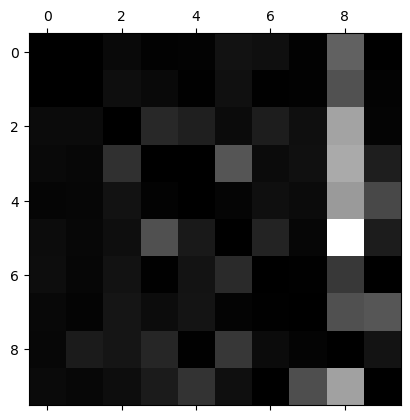

In [67]:
# Fill diagonal with zero to see only error_rate

np.fill_diagonal(norms_conf_mx,0)
plt.matshow(norms_conf_mx,cmap=plt.cm.gray)

In [68]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [69]:
type(X_train[0])

numpy.ndarray

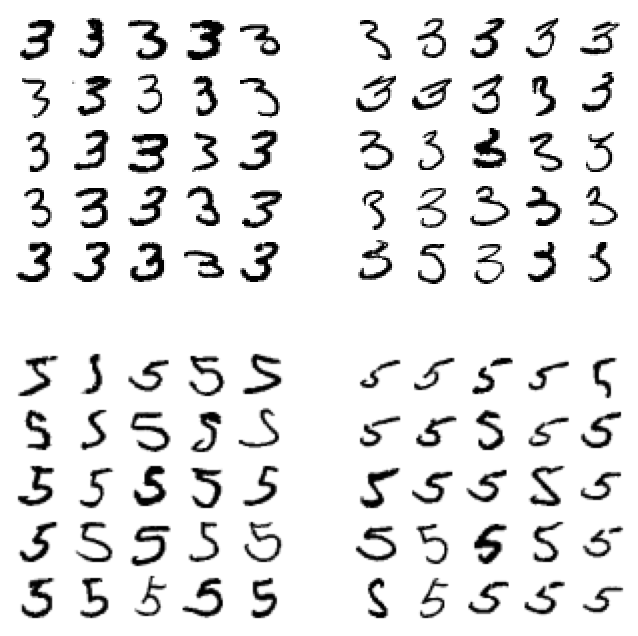

In [81]:

cl_a, cl_b = 3,5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


plt.figure(figsize=(8,8))
plt.subplot(221)
plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25],images_per_row=5)

1. 2 Left 5x5 blocks show '3' and 2 Right 5x5 blocks show '5' 
2. Some digits are classified wrong:
    1. bottom left 
    2. top right

# Multilabel Classification

1. Predict more than one class on single instance 
2. It predict multiple binary tags

In [121]:
import warnings
warnings.filterwarnings(action='ignore')

# Suppose we want to check if digit is big (>= 7, 8, 9)
# or odd number 
# Two labels big or odd number

from sklearn.neighbors import KNeighborsClassifier  # KNeighborsClassifier supports multiple outputs

y_train_large = (y_train >= 7) # digit is big
y_train_odd = (y_train % 2 == 1) # Odd number

y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([some_digit])


array([[False,  True]])

## Observations:
1. False for 5 greater than 7
2. True for 5 is Odd Number

In [85]:
# Compute the F1 score

y_train_knn_clf_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_clf_pred,average="macro")

0.976410265560605

# MultiOutput Classification 

In [89]:
# Add noise to image
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [135]:
def plot_digit(data,title=""):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.title(title)
    plt.axis("off")

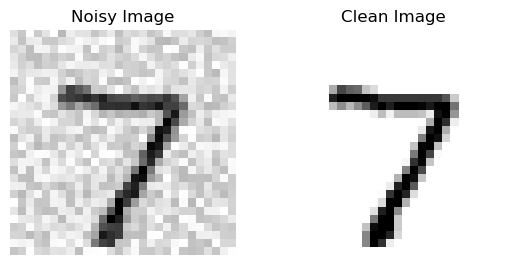

In [136]:


# Noisy Image
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index],"Noisy Image")
plt.subplot(122); plot_digit(y_test_mod[some_index],"Clean Image")

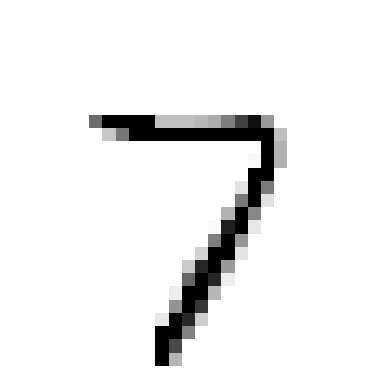

In [137]:
# Train Classifier to clean image
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
